#Redes Neuronales

##Vectorización

Un elemento importante de los *frameworks* de trabajo para redes neuronales y es la **vectorización**. Para entender este concepto, haremos un ejemplo

In [1]:
#Por ejemplo, para el cálculo de ra red entrada de un perceptrón

#Definimos, por ejemplo, tres entradas.

x0, x1, x2 = 1., 2., 3.
bias, w1, w2 = 0.1, 0.2, 0.3

x = [x0, x1, x2]
w = [bias, w1, w2]
#Si fueramos a calcular la salida de forma tradicional, tendríamos que usar un ciclo

z=0 #Inicializamos la salida con 0

for i in range(len(x)):
  z += x[i]*w[i]

print(z)

1.4


In [2]:
#Por comprehension (sigue siendo una operación no vectorizada pero se resume en una sola línea de código)

z = sum(x_i * w_i for x_i, w_i in zip(x, w))
print(z)

1.4


In [3]:
#En forma de vectorización, se haaría así (trabajo en paralelo)
import numpy as np

#Inicialmente, x y w son listas, necesitamos convertirlas en arreglso numéricos
x_vec, w_vec = np.array(x), np.array(w)

z = np.dot(x_vec, w_vec)
print(z)

1.4


##Implementamos de un perceptrón con Pytorch

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [5]:
#Cargamos la base de datos
data = np.genfromtxt('/content/drive/MyDrive/Aprendizaje Supervisado/Bases de Datos/perceptron_toydata.txt', delimiter='\t')

In [6]:
#Separamos los datos de la etiqueta
X, y = data [:, :2], data[:, 2]

#Castigamos el tipo de dato de y para que sea entero
y = y.astype(int)

In [7]:
#Vamos a generar la participación train y test
#Primero generamos los índices aleatorios para cada conjunto
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(seed=123)
shuffle_rng.shuffle(shuffle_idx)

#Reasignammos X e y
X, y = X[shuffle_idx], y[shuffle_idx]

#Generamos la separeción de los conjuntos
X_train, y_train = X[shuffle_idx[:70]], y[shuffle_idx[:70]]
X_test, y_test = X[shuffle_idx[70:]], y[shuffle_idx[70:]]

In [8]:
#Aplicamos estandarización como preprocesamiento
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(-3.0, 3.0)

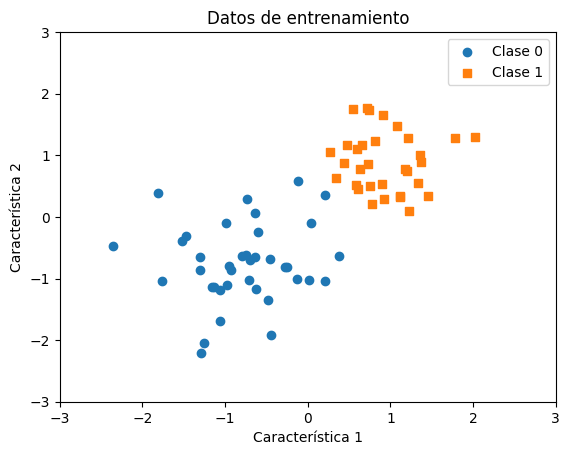

In [13]:
#Graficamos para observar la distribución de los datos
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='Clase 0', marker = 'o')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='Clase 1', marker = 's')
plt.title('Datos de entrenamiento')
plt.legend()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])

(-3.0, 3.0)

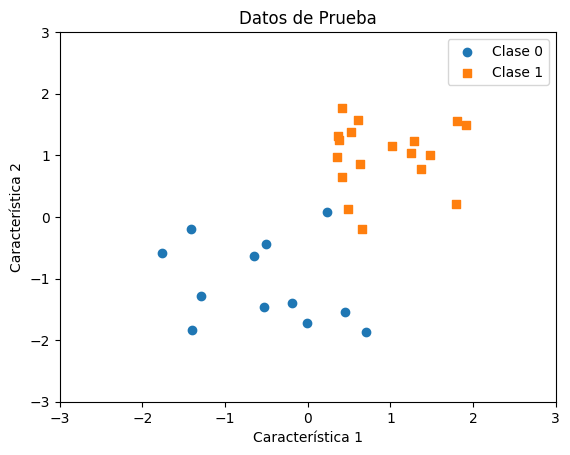

In [15]:
#Graficamos para observar la distribución de los datos
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label='Clase 0', marker = 'o')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label='Clase 1', marker = 's')
plt.title('Datos de Prueba')
plt.legend()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])